## Import Libraries

In [1]:
import numpy as np
from math import sqrt

from pylearn_ml191.linear_regression import SoftmaxRegression

import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

## 1. Data Generation

In [2]:
# Setting for generate data 
means = [[2,2], [4, 2], [3, 0], [3, 1]]
cov = [[.15, 0], [0, .15]]

# Numbers of class 
K = 4

# Nums sample for each class 
N = 100

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X = np.concatenate((X0, X1, X2, X3), axis=0)
X = np.concatenate((np.ones((K*N, 1)), X), axis = 1)

class_0 = np.array([0] * N)
class_1 = np.array([1] * N)
class_2 = np.array([2] * N)
class_3 = np.array([3] * N)
y = np.concatenate((class_0, class_1, class_2, class_3), axis=0)

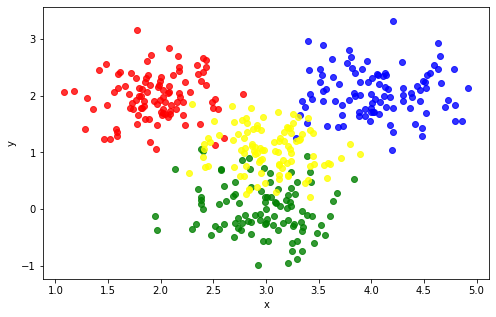

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(X0[:,0], X0[:,1], c='red', alpha=0.8)
plt.scatter(X1[:,0], X1[:,1], c='blue', alpha=0.8)
plt.scatter(X2[:,0], X2[:,1], c='green', alpha=0.8)
plt.scatter(X3[:,0], X3[:,1], c='yellow', alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Softmax Regression

In [4]:
model = SoftmaxRegression(4, use_features_extractor=True)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [6]:
history = model.fit(X_train, y_train, 
                    X_val, y_val, 
                    batch_size=64,
                    lr_decay=0.1,
                    step_to_lr_decay=500,
                    verbose=20,
                    max_steps=10000)

[Step: 20] Train-loss: 6.6199040187640374, Val-loss: 6.6199040187640374
[Step: 40] Train-loss: 5.180772711423957, Val-loss: 3.309902011881852
[Step: 60] Train-loss: 4.029467658615047, Val-loss: 2.5705786337332084
[Step: 80] Train-loss: 2.73424948894582, Val-loss: 3.45748051250468
[Step: 100] Train-loss: 3.741641404083876, Val-loss: 3.1659888811418493
[Step: 120] Train-loss: 5.036859580689948, Val-loss: 4.8929461101552665
[Step: 140] Train-loss: 2.5903363582118115, Val-loss: 2.3025100967447845
[Step: 160] Train-loss: 2.1585969693757936, Val-loss: 2.8794403548443706
[Step: 180] Train-loss: 3.0220757504138356, Val-loss: 2.5903363582118115
[Step: 200] Train-loss: 3.741641404083876, Val-loss: 4.605120188487924
[Step: 220] Train-loss: 1.7333650852447038, Val-loss: 2.73424948894582
[Step: 240] Train-loss: 3.597728273349868, Val-loss: 3.452633364389936
[Step: 260] Train-loss: 4.02946769562551, Val-loss: 4.173380796285901
[Step: 280] Train-loss: 4.17338079628592, Val-loss: 4.892946448489658
[St

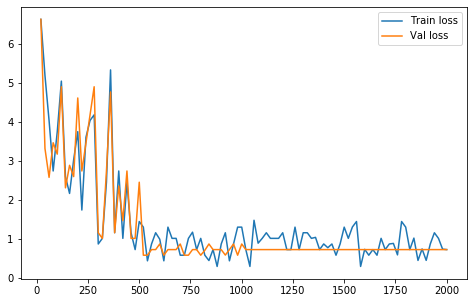

In [7]:
plt.figure(figsize=(8,5))
plt.plot(history["steps"], history["train_losses"], label='Train loss')
plt.plot(history["steps"], history["val_losses"], label='Val loss')
plt.legend()
plt.show()

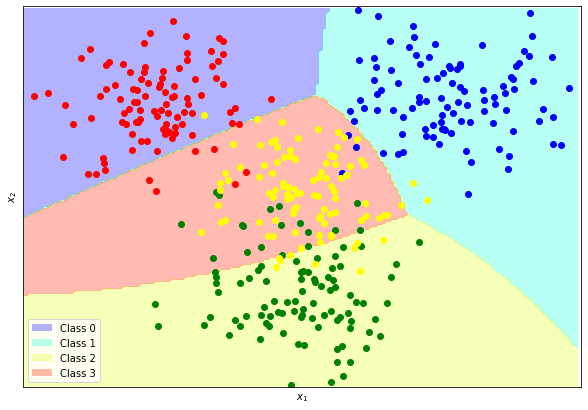

In [8]:
step_size = 0.025
x_min = 1
x_max = 5
y_min = -1
y_max = 3

xm = np.arange(x_min, x_max, step_size)
xlen = len(xm)
ym = np.arange(y_min, y_max, step_size)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)

XX = np.concatenate((np.ones((xx.size, 1)), xx1, yy1), axis = 1)

y_preds = model.eval(XX, categorical=True)
y_preds = np.reshape(y_preds, xx.shape)

plt.figure(figsize=(10,7))
cs = plt.contourf(xx, yy, y_preds, 200, cmap='jet', alpha = .3, levels=3)
proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]
plt.legend(proxy, ["Class 0", "Class 1", "Class 2", "Class 3"])
plt.scatter(X0[:, 0], X0[:, 1], c = 'red', alpha = 1)
plt.scatter(X1[:, 0], X1[:, 1], c = 'blue', alpha = 1)
plt.scatter(X2[:, 0], X2[:, 1], c = 'green', alpha = 1)
plt.scatter(X3[:, 0], X3[:, 1], c = 'yellow', alpha = 1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('$x_1$', fontsize = 10)
plt.ylabel('$x_2$', fontsize = 10)
plt.show()